In [1]:

import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATDynamic, nets
from NEATModels.config import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [4]:
imagename = '/home/sancere/Kepler/FinalONEATTraining/NEATTest/Test.tif'
model_dir = '/home/sancere/Kepler/FinalONEATTraining/Microneatmodel/'
savedir= '/home/sancere/Kepler/FinalONEATTraining/NEATTest/'
model_name = 'microseqnetbin2d56_oldcopy'
division_categories_json = model_dir + 'MicroscopeCategories.json'
catconfig = load_json(division_categories_json)
division_cord_json = model_dir + 'MicroscopeCord.json'
cordconfig = load_json(division_cord_json)
model = NEATDynamic(None, model_dir , model_name,catconfig, cordconfig)
n_tiles = (1,1)
event_threshold = 0.95
iou_threshold = 0.3

In [5]:
model.predict(imagename, n_tiles = n_tiles, event_threshold = event_threshold, iou_threshold = iou_threshold)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



100%|██████████| 180/180 [01:18<00:00,  2.28it/s]


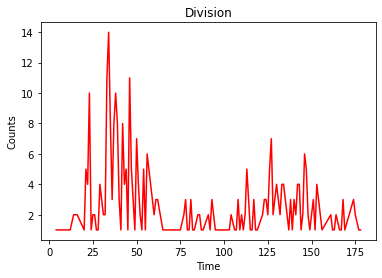

In [6]:
for (event_name,event_label) in catconfig.items():
    if event_label > 0:
      csvname = os.path.dirname(imagename) + "/" + event_name + "Location" + (os.path.splitext(os.path.basename(imagename))[0] + '.csv')
      model.event_counter(imagename, csvname, event_name,savedir)